# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import warnings # Ignoring warnings
warnings.filterwarnings("ignore") # no warnings will be printed

# Importing Data

In [2]:
#Importing my CSV file and printing the head of it.
laptops = pd.read_csv('laptops.csv')
laptops.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
#Show the amount of rows and columns in it
laptops.shape

(1303, 13)

In [4]:
#Show column headings
laptops.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

# Preparation

In [26]:
# Check for any null values
laptops.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [27]:
# Check for any duplicates
laptops.duplicated().sum()

0

In [3]:
# Create a new table without "Laptop ID" column 
linf=laptops[["Company", "Product", "TypeName", "Inches","ScreenResolution", "Cpu", "Ram", "Memory", "Gpu", "OpSys", "Weight", "Price_euros"]]

In [5]:
# Check cloumn headings
linf.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

In [46]:
# Confirming that there are fewer columns than in the original file.
linf.shape

(1303, 12)

In [4]:
# Showing Top 5 laptops sorted by Company and price to find the most expensive ones
laptops_sorted = linf.sort_values('Price_euros', ascending=False)
print(laptops_sorted[["Company", "Price_euros"]].head(5))

     Company  Price_euros
196    Razer       6099.0
830    Razer       5499.0
610   Lenovo       4899.0
749       HP       4389.0
1066    Asus       3975.0


In [4]:
# Calculating the average price of a laptop for each brand
brand_avg_price = linf.groupby('Company')['Price_euros'].mean()
print(brand_avg_price.head(20))

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64


# Preliminary Analysis to identify the Leading Laptop Brands in the market

In [5]:
# Checking prices from the file to see what is the price range
linf[["Price_euros"]].describe()

,Price_euros
count,1303.000000
mean,1123.686992
std,699.009043
min,174.000000
25%,599.000000
50%,977.000000
75%,1487.880000
max,6099.000000


In [5]:
#Checking for the cheapest and most expensive laptop 
cheapest_laptop_index = linf["Price_euros"].idxmin()
cheapest_brand = linf.loc[cheapest_laptop_index, "Company"]
cheapest_model = linf.loc[cheapest_laptop_index, "Product"]
cheapest_price = linf.loc[cheapest_laptop_index, "Price_euros"]

most_expensive_laptop_index = linf["Price_euros"].idxmax()
most_expensive_brand = linf.loc[most_expensive_laptop_index, "Company"]
most_expensive_model = linf.loc[most_expensive_laptop_index, "Product"]
most_expensive_price = linf.loc[most_expensive_laptop_index, "Price_euros"]

print(f"{cheapest_brand} has the cheapest laptop: {cheapest_model} - Price: {cheapest_price} euros")
print(f"{most_expensive_brand} has the most expensive laptop: {most_expensive_model} - Price: {most_expensive_price} euros")

Acer has the cheapest laptop: C740-C9QX (3205U/2GB/32GB/Chrome - Price: 174.0 euros
Razer has the most expensive laptop: Blade Pro - Price: 6099.0 euros


In [41]:
#Checking the amount of laptops each Company has.
brand_counts = linf['Company'].value_counts()
brand_counts

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

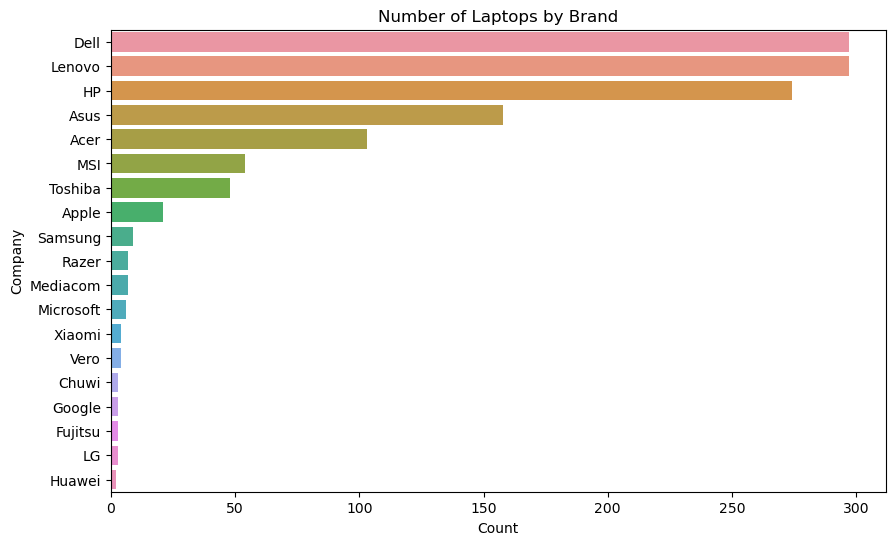

In [7]:
# Visualizing the number of laptops by brand.
brand_counts = linf['Company'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts, y=brand_counts.index)
plt.xlabel('Count')
plt.ylabel('Company')
plt.title('Number of Laptops by Brand')
plt.show()

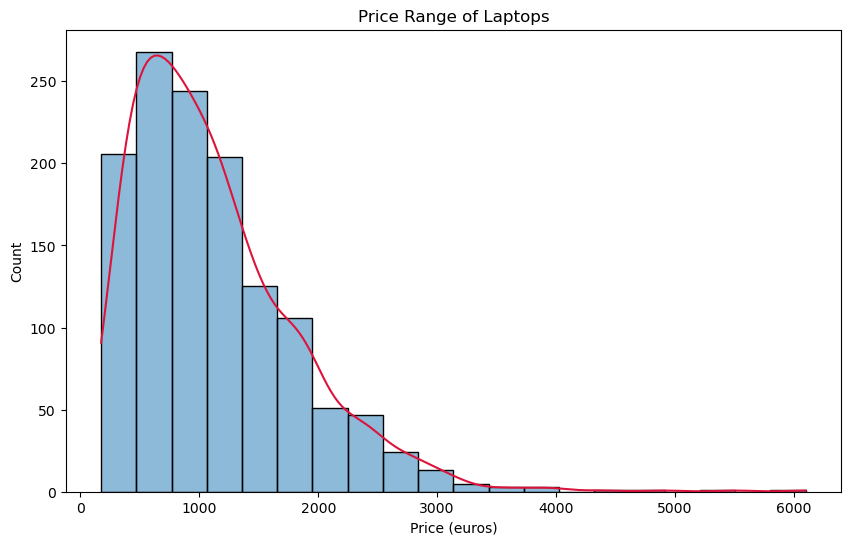

In [8]:
# Plotting a histogram of laptop prices
plt.figure(figsize=(10, 6))
sns.histplot(linf['Price_euros'], bins=20, kde=True, stat="count", palette='Blues')

# Customize the color of the KDE line
kde_line = plt.gca().lines[0]
kde_line.set_color('crimson')

# Setting the labels and title
plt.xlabel('Price (euros)')
plt.ylabel('Count')
plt.title('Price Range of Laptops')

# Displaying the histogram
plt.show()

In [35]:
#Filtering and displauing the company and price information of laptops priced below 2000 euros.
grouped_laptops = linf[linf['Price_euros'] < 2000]
print(grouped_laptops[["Company", "Price_euros"]].head(1303))

     Company  Price_euros
0      Apple      1339.69
1      Apple       898.94
2         HP       575.00
4      Apple      1803.60
5       Acer       400.00
...      ...          ...
1298  Lenovo       638.00
1299  Lenovo      1499.00
1300  Lenovo       229.00
1301      HP       764.00
1302    Asus       369.00

[1166 rows x 2 columns]


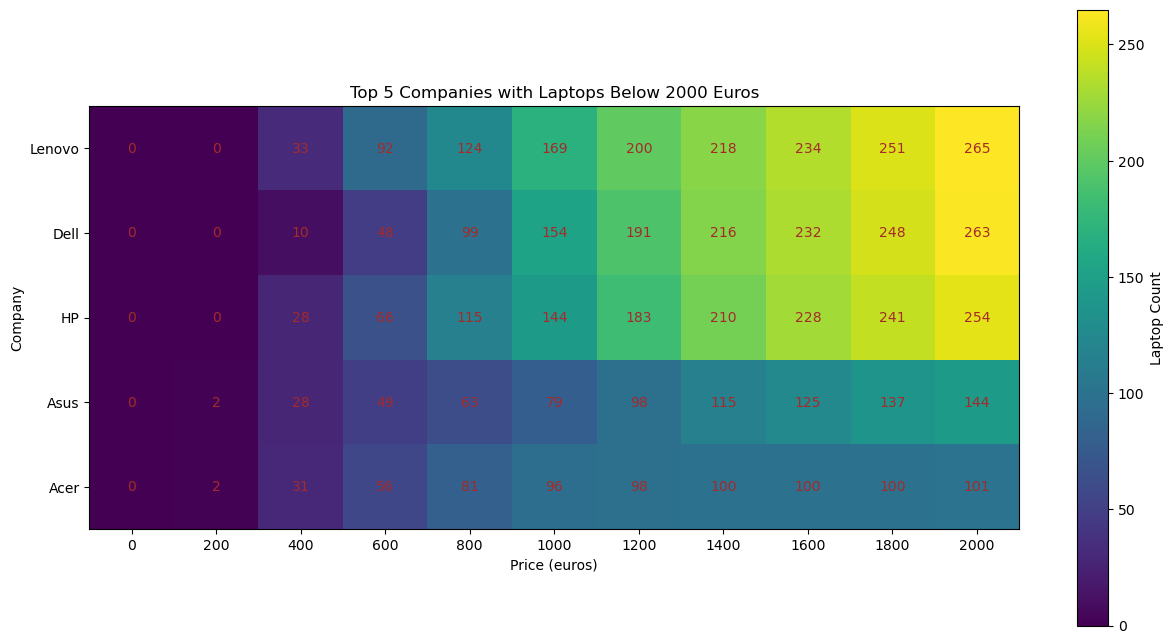

In [7]:
# Creating a heatmap displaying the laptop counts below 2000 euros for the top 5 companies.
price_ranges = np.arange(0, 2001, 200)

price_threshold = 2000
filtered_laptops = linf[linf['Price_euros'] < price_threshold]

top_companies = filtered_laptops['Company'].value_counts().nlargest(5).index

laptop_counts = np.zeros((len(top_companies), len(price_ranges)))

for i, company in enumerate(top_companies):
    for j, price in enumerate(price_ranges):
        count = len(filtered_laptops[(filtered_laptops['Company'] == company) & (filtered_laptops['Price_euros'] < price)])
        laptop_counts[i, j] = count
plt.figure(figsize=(15, 8))
plt.imshow(laptop_counts, cmap='viridis')
plt.xticks(np.arange(len(price_ranges)), price_ranges)
plt.yticks(np.arange(len(top_companies)), top_companies)

for i in range(len(top_companies)):
    for j in range(len(price_ranges)):
        count = laptop_counts[i, j]
        plt.text(j, i, int(count), ha='center', va='center', color='brown')

plt.xlabel('Price (euros)')
plt.ylabel('Company')
plt.title(f'Top 5 Companies with Laptops Below {price_threshold} Euros')
cbar = plt.colorbar()
cbar.set_label('Laptop Count')
plt.show()

In [9]:
# Creating a heatmap of popular values showing their counts across screen resolutions and memory sizes, to see the most popular configuration.
def popular_heatmap(data, column, top_n):
    top_values = data[column].value_counts().nlargest(top_n).index
    counts = pd.pivot_table(data[data[column].isin(top_values)], index='ScreenResolution', columns='Memory', aggfunc='size', fill_value=0)
    
    plt.figure(figsize=(18, 5))
    sns.heatmap(counts, cmap='Blues', annot=True, fmt='d')
    plt.xlabel('Memory')
    plt.ylabel('Screen Resolution')
    plt.title(f'Top {top_n} Popular {column} Counts')
    plt.show()

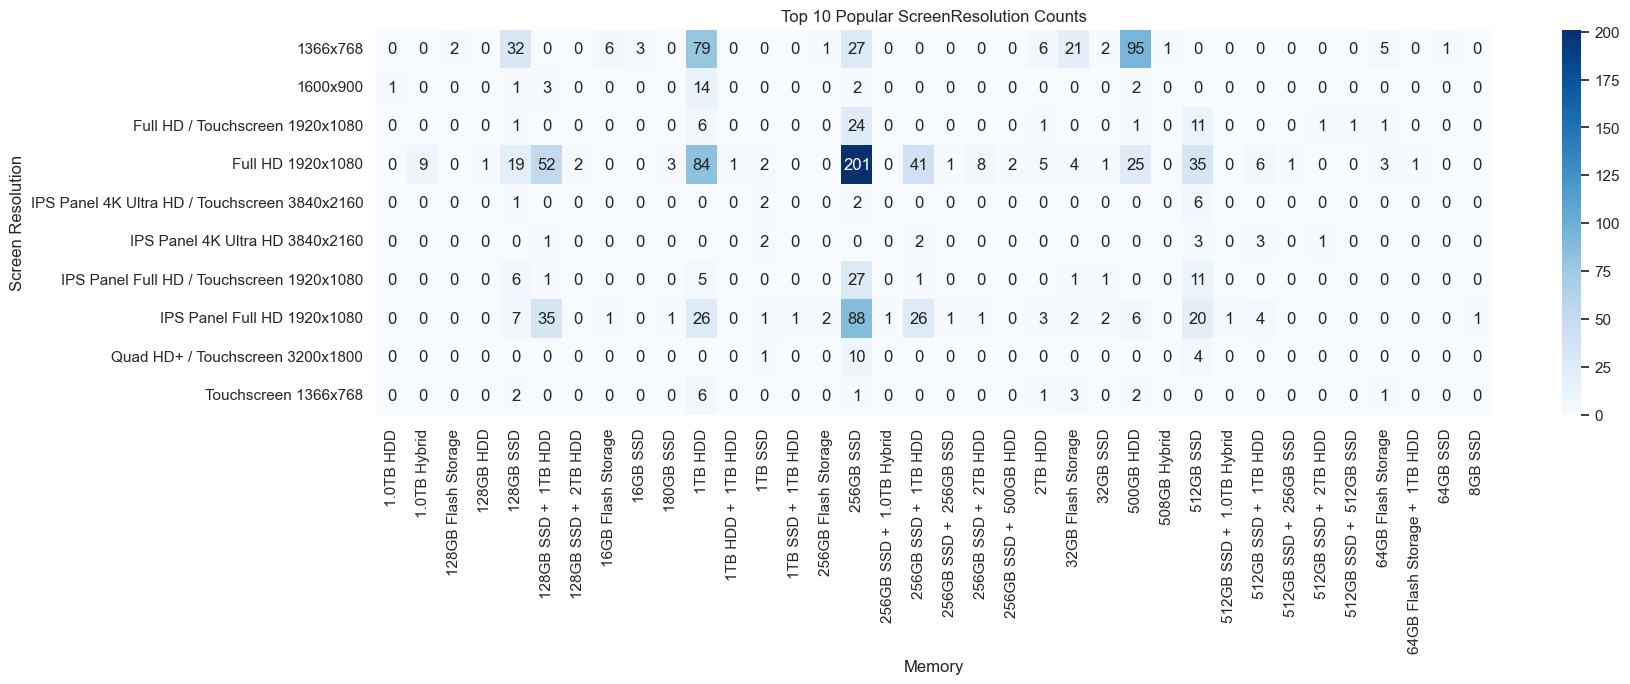

In [38]:
popular_heatmap(linf, 'ScreenResolution', 10)

# Adding a new colum for popularity of laptops by Company

In [10]:
# Creating a re-usable code for finding Top 5 most popular companies in the file
def categorize_popularity(data):
    conditions = [
        (data['Company'].isin(data['Company'].value_counts().nlargest(5).index))
    ]
    
    values = ['Popular Company']
    
    data['PopularityStatus'] = np.select(conditions, values, default='Not Popular Company')
    
    return data

linf = categorize_popularity(linf)

In [7]:
linf.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,PopularityStatus
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,Not Popular Company
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,Not Popular Company
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,Popular Company
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,Not Popular Company
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,Not Popular Company


In [11]:
#This code counts and displays the occurrences of popular companies based on the "PopularityStatus" column in the "linf" DataFrame.
popular_companies = linf[linf['PopularityStatus'] == 'Popular Company']
print(popular_companies['Company'].value_counts())

Dell      297
Lenovo    297
HP        274
Asus      158
Acer      103
Name: Company, dtype: int64


# Further Analysis based on the new column of Popularity

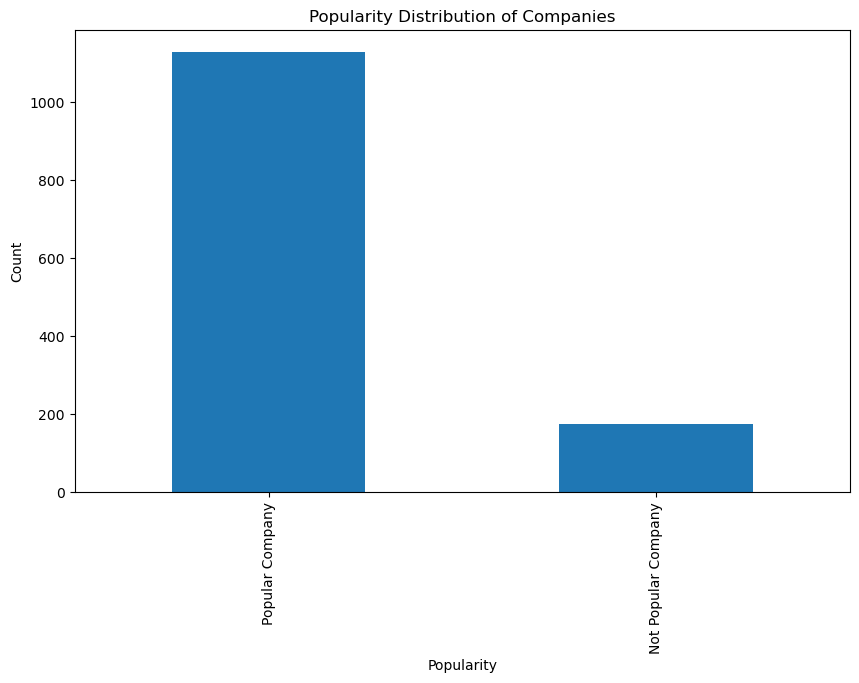

In [12]:
#The bar chart shows the popularity distribution of companies in the dataset, indicating the count of laptops for each popularity status.
popularity_counts = linf['PopularityStatus'].value_counts()

# Plot the popularity distribution
plt.figure(figsize=(10, 6))
popularity_counts.plot(kind='bar')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Popularity Distribution of Companies')
plt.show()

In [9]:
# The code identifies and presents the most popular laptop model for each of the top 5 companies based on their popularity status in the dataset.
top_companies = linf['Company'].value_counts().nlargest(5).index

for company in top_companies:
    popular_laptop = linf[linf['Company'] == company].sort_values('PopularityStatus', ascending=False).iloc[0]
    print(f"Most popular laptop for {company}: {popular_laptop['Product']}")

Most popular laptop for Dell: Inspiron 3567
Most popular laptop for Lenovo: IdeaPad 320-15IKB
Most popular laptop for HP: 250 G6
Most popular laptop for Asus: ZenBook UX430UN
Most popular laptop for Acer: Aspire 3


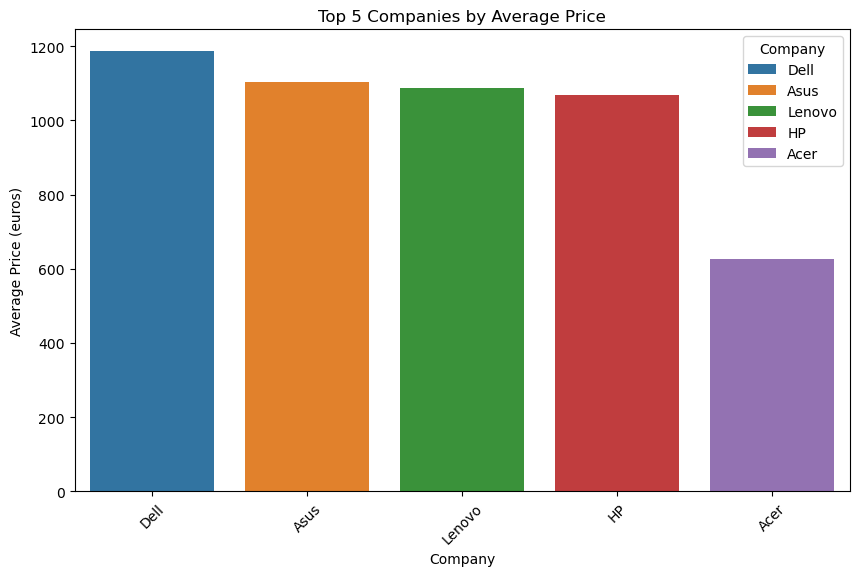

In [10]:
#The groupby function groups the data by 'Company' and calculates the average price for each company, which is then plotted for the top 5 companies.
#This graph displays a bar chart showing the average price (in euros) for the top 5 companies, allowing for a visual comparison of the price ranges across different companies.
top_companies = linf['Company'].value_counts().nlargest(5).index

company_wage_mean = linf.groupby('Company', as_index=False)['Price_euros'].mean().sort_values(by='Price_euros', ascending=False)
top_company_wage_mean = company_wage_mean[company_wage_mean['Company'].isin(top_companies)]

plt.figure(figsize=(10, 6))
sns.barplot(data=top_company_wage_mean, x='Company', y='Price_euros', hue='Company', dodge=False)
plt.xlabel('Company')
plt.ylabel('Average Price (euros)')
plt.title('Top 5 Companies by Average Price')
plt.xticks(rotation=45)
plt.show()

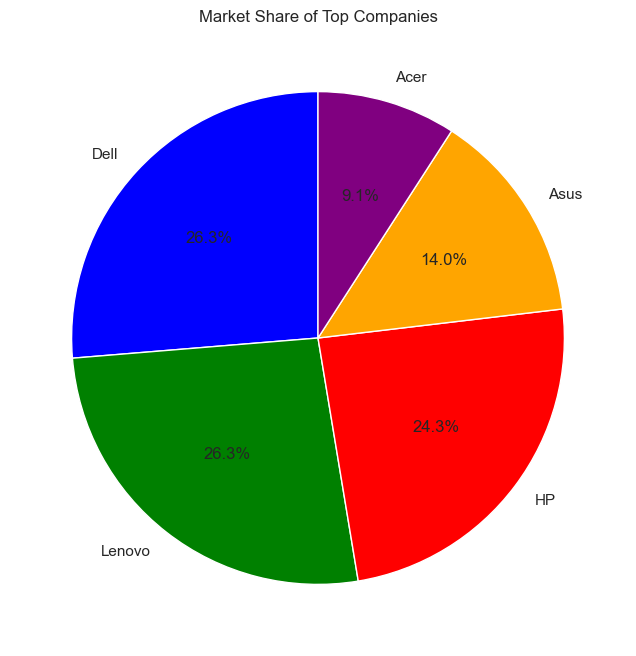

In [47]:
# Visualizing the share of each popular company in the top 5.
top_companies = linf['Company'].value_counts().nlargest(5)
market_share = top_companies / top_companies.sum() * 100

color_dict = {'Acer': 'purple', 'HP': 'red', 'Lenovo': 'green', 'Asus': 'orange', 'Dell': 'blue'}

company_labels = market_share.index
company_colors = [color_dict.get(company, 'gray') for company in company_labels]

plt.figure(figsize=(8, 8))
plt.pie(market_share, labels=company_labels, autopct='%1.1f%%', startangle=90, colors=company_colors)
plt.title('Market Share of Top Companies')
plt.show()

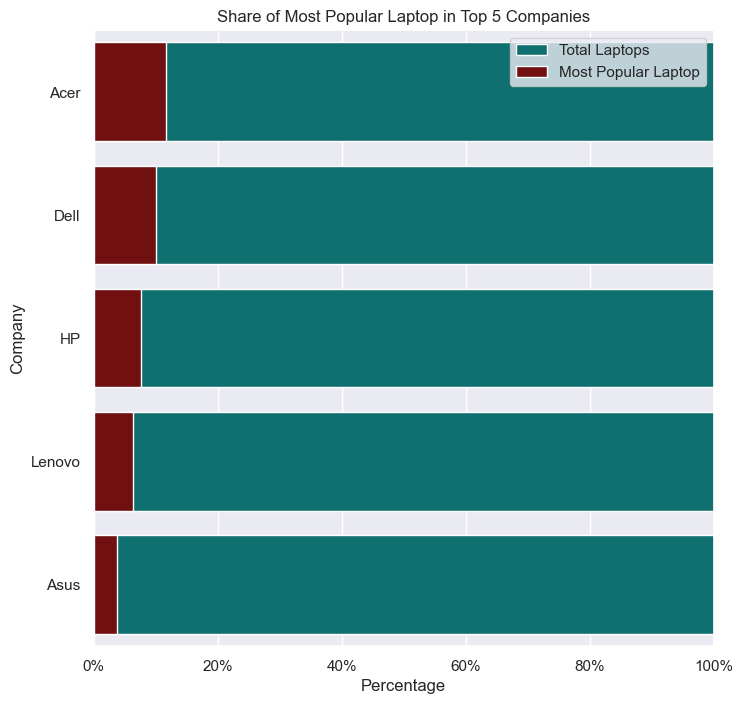

In [13]:
# This graph compares laptop quantities and most popular models for the top 5 companies.
top_companies = linf['Company'].value_counts().nlargest(5).index
top_company_data = linf[linf['Company'].isin(top_companies)]
company_total_quantity = top_company_data['Company'].value_counts()
company_most_popular_model_count = top_company_data.groupby('Company')['Product'].apply(lambda x: x.value_counts().nlargest(1)).reset_index(level=1, drop=True)
company_share_most_popular = company_most_popular_model_count / company_total_quantity
sorted_companies = company_share_most_popular.sort_values(ascending=False).index
company_share_percentage = company_share_most_popular * 100

plt.figure(figsize=(8, 8))
sns.set(style="darkgrid")
ax = sns.barplot(x=company_total_quantity.loc[sorted_companies], y=sorted_companies, color='teal', label='Total Laptops')
ax = sns.barplot(x=company_share_percentage.loc[sorted_companies], y=sorted_companies, color='maroon', label='Most Popular Laptop')

plt.title('Share of Most Popular Laptop in Top 5 Companies')
plt.xlabel('Percentage')
plt.ylabel('Company')
plt.xlim(0, 100)
ax.xaxis.set_major_formatter(ticker.PercentFormatter())

plt.legend()
plt.show()

In [34]:
# Finding the most popular laptop model for each company based on the quantity of laptops they have.
top_companies = linf['Company'].value_counts().nlargest(5).index
popular_laptop_counts = pd.DataFrame(columns=['Company', 'Most Popular Model', 'Count'])

for company in top_companies:
    company_data = linf[linf['Company'] == company]
    popular_laptops = company_data[company_data['PopularityStatus'] == 'Popular Company']
    most_popular_model = popular_laptops['Product'].value_counts().idxmax()
    count = popular_laptops[popular_laptops['Product'] == most_popular_model].shape[0]
    popular_laptop_counts = popular_laptop_counts.append({'Company': company, 'Most Popular Model': most_popular_model, 'Count': count}, ignore_index=True)

popular_laptop_counts

,Company,Most Popular Model,Count
0,Dell,XPS 13,30
1,Lenovo,Legion Y520-15IKBN,19
2,HP,250 G6,21
3,Asus,Rog Strix,6
4,Acer,Aspire 3,12


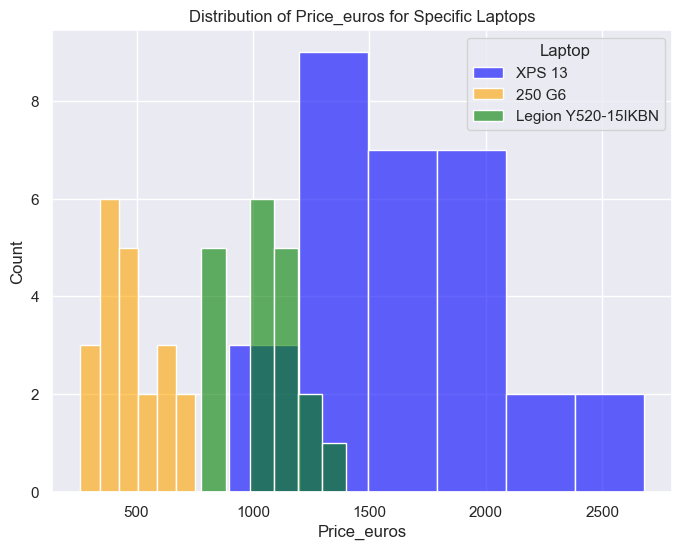

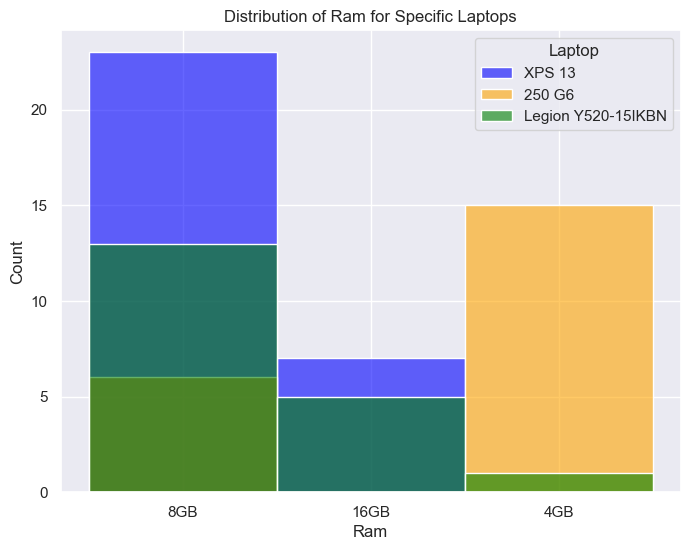

<Figure size 800x600 with 0 Axes>

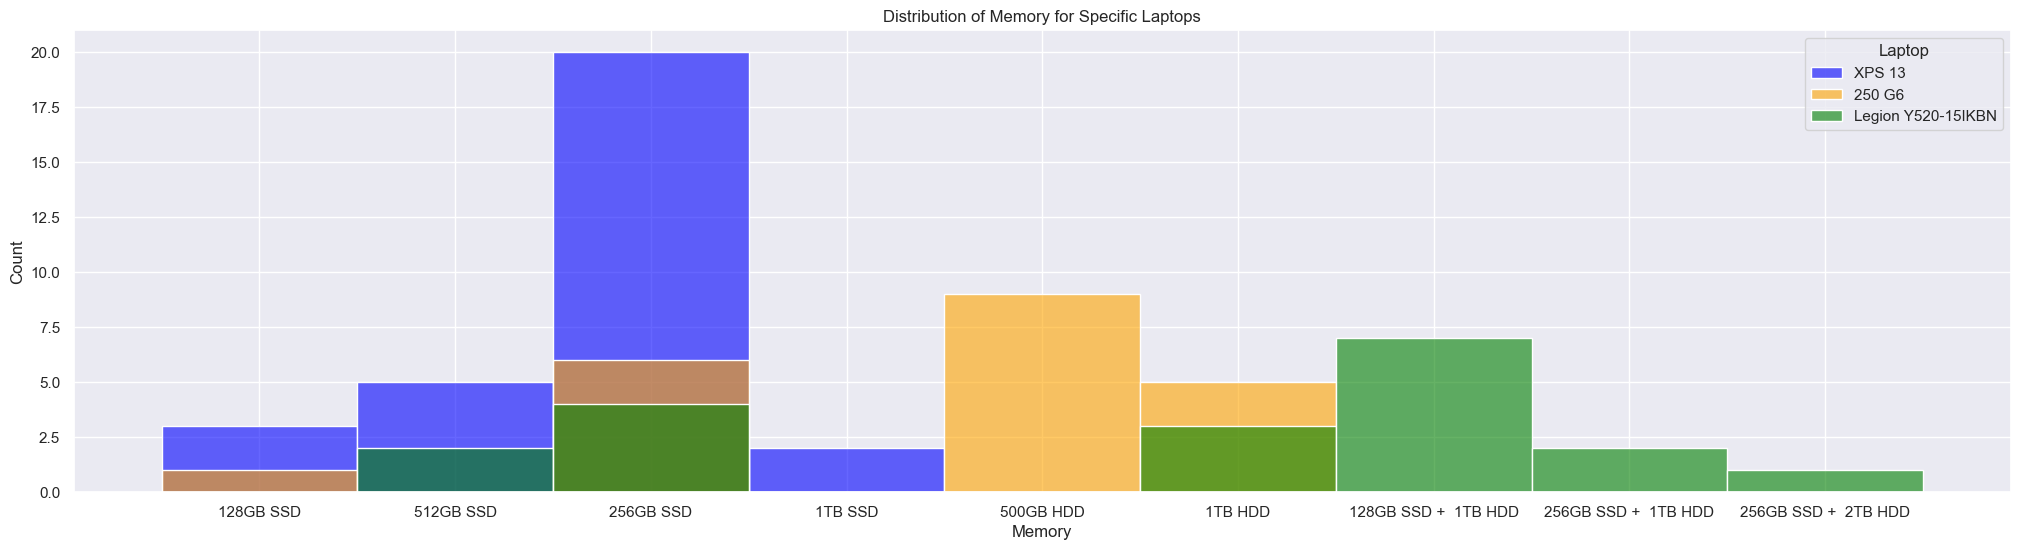

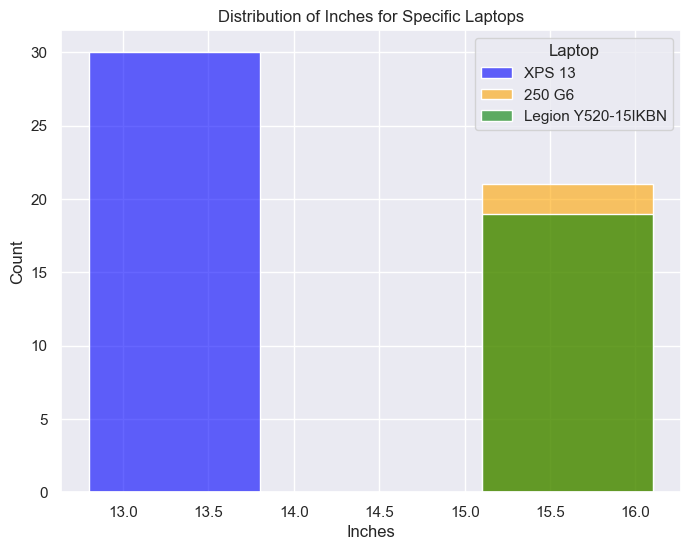

In [40]:
# Compairing the top 3 most popular laptops by Price, Memory, Ram and Inches.
laptop_colors = {'XPS 13': 'blue', '250 G6': 'orange', 'Legion Y520-15IKBN': 'green'}
laptops_to_compare = ['XPS 13', '250 G6', 'Legion Y520-15IKBN']
specific_laptops = linf[linf['Product'].isin(laptops_to_compare)]
numeric_columns = ['Price_euros', 'Ram', 'Memory', 'Inches']

# Create a histogram plot
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    if col == 'Memory':
        plt.figure(figsize=(25, 6))  # Adjust the figure size specifically for the memory plot to fit all the information
    for laptop in laptops_to_compare:
        laptop_data = specific_laptops[specific_laptops['Product'] == laptop]
        sns.histplot(data=laptop_data, x=col, color=laptop_colors[laptop], label=laptop, alpha=0.6)
    plt.title(f'Distribution of {col} for Specific Laptops')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Laptop')
    plt.show()
